### Deliverable 1: Preprocessing the Data for a Neural Network

In [501]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [502]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(['EIN','NAME'], axis=1, inplace=True)



In [503]:
application_df.shape

(34299, 10)

In [504]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [505]:
# Look at APPLICATION_TYPE value counts for binning
application_counts = application_df.APPLICATION_TYPE.value_counts()
application_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

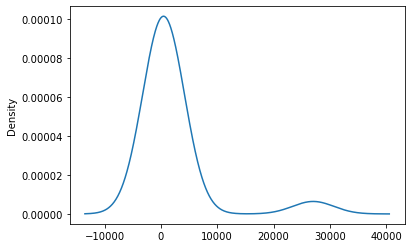

In [506]:
# Visualize the value counts of APPLICATION_TYPE
application_counts.plot.density()

In [507]:
# Determine which values to replace if counts are less than 500
replace_application = list(application_counts[application_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [508]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

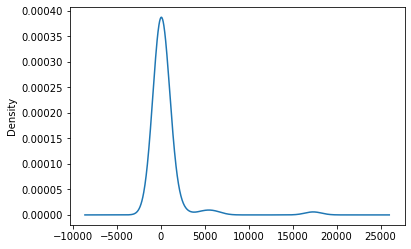

In [509]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [510]:
# Determine which values to replace if counts are less than 5
replace_class = list(classification_counts[classification_counts < 5].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
Other       45
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
C8000       20
C7120       18
C1500       16
C6000       15
C1800       15
C1250       14
C8200       11
C1278       10
C1238       10
C1235        9
C1237        9
C7210        7
C4100        6
C1720        6
C2400        6
C1257        5
C1600        5
Name: CLASSIFICATION, dtype: int64

In [511]:
# Generate our categorical variable lists


application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist() 


In [512]:
application_df[application_cat].nunique()

APPLICATION_TYPE           9
AFFILIATION                6
CLASSIFICATION            38
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [513]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))


# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

C:\Users\Bill Remy\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [514]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True,right_index=True) 
application_df = application_df.drop(application_cat,1)
application_df.head()

C:\Users\Bill Remy\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [527]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,  random_state=72)

C:\Users\Bill Remy\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [528]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 2: Compile, Train and Evaluate the Model

In [529]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 50
#hidden_nodes_layer3 = 30

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)


# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
#nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_58"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_177 (Dense)           (None, 100)               7600      
                                                                 
 dense_178 (Dense)           (None, 50)                5050      
                                                                 
 dense_179 (Dense)           (None, 1)                 51        
                                                                 
Total params: 12,701
Trainable params: 12,701
Non-trainable params: 0
_________________________________________________________________


In [530]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [534]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint
# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [535]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

In [536]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=25,callbacks=[cp_callback])

Epoch 1/25
  1/719 [..............................] - ETA: 1s - loss: 809.9409 - accuracy: 0.3438
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 25/719 [>.............................] - ETA: 1s - loss: 18195.8359 - accuracy: 0.4938
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
 49/719 [=>............................] - ETA: 1s - loss: 52711.7461 - accuracy: 0.4796
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to

555/719 [======================>.......] - ETA: 0s - loss: 31645.9238 - accuracy: 0.4845
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
580/719 [=======================>......] - ETA: 0s - loss: 30462.1035 - accuracy: 0.4834
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5
604/719 [========================>.....] - ETA: 0s - loss: 29424.4531 - accuracy: 0.4826
Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoints\weights.01.hdf5

Epoch 1: saving model to checkpoi


Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
411/719 [================>.............] - ETA: 0s - loss: 13268.7607 - accuracy: 0.4916
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
435/719 [=================>............] - ETA: 0s - loss: 12709.1299 - accuracy: 0.4907
Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5

Epoch 2: saving model to checkpoints\weights.02.hdf5
456/719 [==================>...........] - ETA: 0s - loss: 12285.9277 - accuracy: 0.4897
Epoch 2: saving model to checkpoi


Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
247/719 [=========>....................] - ETA: 1s - loss: 9792.9443 - accuracy: 0.5094
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
272/719 [==========>...................] - ETA: 1s - loss: 10976.3936 - accuracy: 0.5117
Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5

Epoch 3: saving model to checkpoints\weights.03.hdf5
297/719 [===========>..................] - ETA: 0s - loss: 10200.7168

 68/719 [=>............................] - ETA: 1s - loss: 3768.9578 - accuracy: 0.4775
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
 92/719 [==>...........................] - ETA: 1s - loss: 3334.8152 - accuracy: 0.4925
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
113/719 [===>..........................] - ETA: 1s - loss: 5430.2700 - accuracy: 0.5008
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints


Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
643/719 [=========================>....] - ETA: 0s - loss: 23086.2285 - accuracy: 0.5024
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
666/719 [==========================>...] - ETA: 0s - loss: 22299.5176 - accuracy: 0.5057
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoints\weights.04.hdf5
688/719 [===========================>..] - ETA: 0s - loss: 21993.8418 - accuracy: 0.5069
Epoch 4: saving model to checkpoints\weights.04.hdf5

Epoch 4: saving model to checkpoi


Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
474/719 [==================>...........] - ETA: 0s - loss: 34666.5117 - accuracy: 0.4879
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
499/719 [===================>..........] - ETA: 0s - loss: 34089.5625 - accuracy: 0.4882
Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5

Epoch 5: saving model to checkpoints\weights.05.hdf5
524/719 [====================>.........] - ETA: 0s - loss: 32505.351


Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
310/719 [===========>..................] - ETA: 0s - loss: 7738.5913 - accuracy: 0.4838
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
334/719 [============>.................] - ETA: 0s - loss: 7779.6572 - accuracy: 0.4856
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints\weights.06.hdf5
355/719 [=============>................] - ETA: 0s - loss: 7828.0557 - accuracy: 0.4863
Epoch 6: saving model to checkpoints\weights.06.hdf5

Epoch 6: saving model to checkpoints

136/719 [====>.........................] - ETA: 1s - loss: 3683.5696 - accuracy: 0.5034
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
160/719 [=====>........................] - ETA: 1s - loss: 6495.2920 - accuracy: 0.5074
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
181/719 [======>.......................] - ETA: 1s - loss: 5833.3911 - accuracy: 0.5110
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints


Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
709/719 [============================>.] - ETA: 0s - loss: 10261.9570 - accuracy: 0.5040
Epoch 7: saving model to checkpoints\weights.07.hdf5

Epoch 7: saving model to checkpoints\weights.07.hdf5
719/719 [==============================] - 2s 2ms/step - loss: 10156.2051 - accuracy: 0.5044
Epoch 8/25
  1/719 [..............................] - ETA: 1s - loss: 9.7222 - accuracy: 0.4062
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
 22/719 [..............................] - ETA: 1s - loss: 2058.1545 - accuracy: 0.4886
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weigh

527/719 [====================>.........] - ETA: 0s - loss: 15203.5586 - accuracy: 0.4960
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
552/719 [======================>.......] - ETA: 0s - loss: 17515.0645 - accuracy: 0.4968
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5
577/719 [=======================>......] - ETA: 0s - loss: 17363.3418 - accuracy: 0.4987
Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoints\weights.08.hdf5

Epoch 8: saving model to checkpoi


Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
378/719 [==============>...............] - ETA: 0s - loss: 6576.8960 - accuracy: 0.5137
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
403/719 [===============>..............] - ETA: 0s - loss: 6269.2495 - accuracy: 0.5177
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints\weights.09.hdf5
428/719 [================>.............] - ETA: 0s - loss: 5982.4624 - accuracy: 0.5167
Epoch 9: saving model to checkpoints\weights.09.hdf5

Epoch 9: saving model to checkpoints

204/719 [=======>......................] - ETA: 1s - loss: 570.5050 - accuracy: 0.5368
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
229/719 [========>.....................] - ETA: 1s - loss: 519.3683 - accuracy: 0.5332
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5
253/719 [=========>....................] - ETA: 1s - loss: 688.5587 - accuracy: 0.5287
Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to checkpoints\weights.10.hdf5

Epoch 10: saving model to 


Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
 49/719 [=>............................] - ETA: 1s - loss: 1116.1205 - accuracy: 0.5459
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
 70/719 [=>............................] - ETA: 1s - loss: 792.6659 - accuracy: 0.5344 
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
 94/719 [==>...........................] - ETA: 1s - loss: 595.6020 - accuracy: 0.5362
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model t


Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
609/719 [========================>.....] - ETA: 0s - loss: 2798.3640 - accuracy: 0.5093
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
630/719 [=========================>....] - ETA: 0s - loss: 2752.6116 - accuracy: 0.5077
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5
653/719 [==========================>...] - ETA: 0s - loss: 2659.1580 - accuracy: 0.5089
Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model to checkpoints\weights.11.hdf5

Epoch 11: saving model 


Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
446/719 [=================>............] - ETA: 0s - loss: 1441.8489 - accuracy: 0.4981
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
471/719 [==================>...........] - ETA: 0s - loss: 2059.5857 - accuracy: 0.4987
Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5

Epoch 12: saving model to checkpoints\weights.12.hdf5
496/719 [===================>..........] - ETA: 0s - los


Epoch 13: saving model to checkpoints\weights.13.hdf5
265/719 [==========>...................] - ETA: 1s - loss: 569.2914 - accuracy: 0.5242
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
287/719 [==========>...................] - ETA: 1s - loss: 701.9633 - accuracy: 0.5231
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5
310/719 [===========>..................] - ETA: 0s - loss: 706.8461 - accuracy: 0.5244
Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to checkpoints\weights.13.hdf5

Epoch 13: saving model to 


Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
 91/719 [==>...........................] - ETA: 1s - loss: 37.6556 - accuracy: 0.5216
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
113/719 [===>..........................] - ETA: 1s - loss: 30.4947 - accuracy: 0.5218
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
137/719 [====>.........................] - ETA: 1s - loss: 25.2878 - accuracy: 0.5237
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to che


Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
648/719 [==========================>...] - ETA: 0s - loss: 5.8486 - accuracy: 0.6133
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
671/719 [==========================>...] - ETA: 0s - loss: 5.6705 - accuracy: 0.6142
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkpoints\weights.14.hdf5
693/719 [===========================>..] - ETA: 0s - loss: 5.5102 - accuracy: 0.6162
Epoch 14: saving model to checkpoints\weights.14.hdf5

Epoch 14: saving model to checkp


Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
484/719 [===================>..........] - ETA: 0s - loss: 0.6240 - accuracy: 0.6764
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
509/719 [====================>.........] - ETA: 0s - loss: 0.6234 - accuracy: 0.6774
Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5

Epoch 15: saving model to checkpoints\weights.15.hdf5
534/719 [=====================>........] - ETA: 0s - loss: 0.6225 - accuracy: 0.6780
Epoch 15: saving model to checkp


Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
320/719 [============>.................] - ETA: 0s - loss: 0.6181 - accuracy: 0.6870
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
345/719 [=============>................] - ETA: 0s - loss: 0.6179 - accuracy: 0.6883
Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5

Epoch 16: saving model to checkpoints\weights.16.hdf5
370/719 [==============>...............] - ETA: 0s - loss: 0.6168 - accuracy: 0.6891
Epoch 16: saving model to checkp


Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
160/719 [=====>........................] - ETA: 1s - loss: 0.6039 - accuracy: 0.7018
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
181/719 [======>.......................] - ETA: 1s - loss: 0.6047 - accuracy: 0.7008
Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5

Epoch 17: saving model to checkpoints\weights.17.hdf5
206/719 [=======>......................] - ETA: 1s - loss: 0.6061 - accuracy: 0.6993
Epoch 17: saving model to checkp


Epoch 17: saving model to checkpoints\weights.17.hdf5
719/719 [==============================] - 2s 2ms/step - loss: 0.6174 - accuracy: 0.6888
Epoch 18/25
  1/719 [..............................] - ETA: 1s - loss: 0.5572 - accuracy: 0.7500
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
 22/719 [..............................] - ETA: 1s - loss: 0.6016 - accuracy: 0.7102
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
 47/719 [>.............................] - ETA: 1s - loss: 0.6036 - accuracy: 0.7061
Epoch 18: saving model to checkpoints\wei

547/719 [=====================>........] - ETA: 0s - loss: 0.7208 - accuracy: 0.5456
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
571/719 [======================>.......] - ETA: 0s - loss: 0.7197 - accuracy: 0.5444
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5
592/719 [=======================>......] - ETA: 0s - loss: 0.7187 - accuracy: 0.5435
Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkpoints\weights.18.hdf5

Epoch 18: saving model to checkp

378/719 [==============>...............] - ETA: 0s - loss: 0.6906 - accuracy: 0.5356
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
398/719 [===============>..............] - ETA: 0s - loss: 0.6907 - accuracy: 0.5355
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
422/719 [================>.............] - ETA: 0s - loss: 0.6907 - accuracy: 0.5348
Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5

Epoch 19: saving model to checkpoints\weights.19.hdf5
443/719 [=================>......

207/719 [=======>......................] - ETA: 1s - loss: 0.6890 - accuracy: 0.5460
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
229/719 [========>.....................] - ETA: 1s - loss: 0.6888 - accuracy: 0.5468
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
252/719 [=========>....................] - ETA: 1s - loss: 0.6893 - accuracy: 0.5445
Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5

Epoch 20: saving model to checkpoints\weights.20.hdf5
272/719 [==========>.............


Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
 48/719 [=>............................] - ETA: 1s - loss: 0.6933 - accuracy: 0.4961
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
 70/719 [=>............................] - ETA: 1s - loss: 0.6928 - accuracy: 0.5107
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
 95/719 [==>...........................] - ETA: 1s - loss: 0.6926 - accuracy: 0.5151
Epoch 21: saving model to checkp


Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
605/719 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5312
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
630/719 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5303
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkpoints\weights.21.hdf5
655/719 [==========================>...] - ETA: 0s - loss: 0.6915 - accuracy: 0.5301
Epoch 21: saving model to checkpoints\weights.21.hdf5

Epoch 21: saving model to checkp


Epoch 22: saving model to checkpoints\weights.22.hdf5
436/719 [=================>............] - ETA: 0s - loss: 0.6915 - accuracy: 0.5318
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
459/719 [==================>...........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5327
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5
481/719 [===================>..........] - ETA: 0s - loss: 0.6916 - accuracy: 0.5312
Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkpoints\weights.22.hdf5

Epoch 22: saving model to checkp


Epoch 23: saving model to checkpoints\weights.23.hdf5
272/719 [==========>...................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5290
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
297/719 [===========>..................] - ETA: 0s - loss: 0.6914 - accuracy: 0.5307
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5
322/719 [============>.................] - ETA: 0s - loss: 0.6915 - accuracy: 0.5300
Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkpoints\weights.23.hdf5

Epoch 23: saving model to checkp


Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
122/719 [====>.........................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5279
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
143/719 [====>.........................] - ETA: 1s - loss: 0.6916 - accuracy: 0.5291
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
166/719 [=====>........................] - ETA: 1s - loss: 0.6920 - accuracy: 0.5258
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkp


Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
678/719 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
703/719 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5335
Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5

Epoch 24: saving model to checkpoints\weights.24.hdf5
719/719 [==============================] - 2s 2ms/step - loss: 0.6912 - accuracy: 0.5331
Epoch 25/25
  1/719 [..............................] - ETA: 0s - loss: 0.7113 - accuracy: 0.3750
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\wei


Epoch 25: saving model to checkpoints\weights.25.hdf5
512/719 [====================>.........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5328
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
534/719 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5334
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5
559/719 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5319
Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkpoints\weights.25.hdf5

Epoch 25: saving model to checkp

In [537]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

354/354 - 0s - loss: 1.2516 - accuracy: 0.6114 - 233ms/epoch - 659us/step
Loss: 1.2516274452209473, Accuracy: 0.6113614439964294
